
Hello world: Planet Kornia
=====================

Welcome to Planet Kornia: a set of tutorial to learn about Computer Vision in PyTorch.

This is the first tutorial showing how one can simply load an image and convert from BGR to RGB using Kornia.


In [1]:
import torch
import kornia
import cv2
import numpy as np

import matplotlib.pyplot as plt

We use OpenCV to load an image to memory represented in a numpy.ndarray



In [2]:
!wget https://github.com/kornia/kornia/raw/master/tutorials/data/arturito.jpeg

--2021-01-22 02:41:03--  https://github.com/kornia/kornia/raw/master/tutorials/data/arturito.jpeg
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kornia/kornia/master/tutorials/data/arturito.jpeg [following]
--2021-01-22 02:41:03--  https://raw.githubusercontent.com/kornia/kornia/master/tutorials/data/arturito.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.132.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.132.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31860 (31K) [image/jpeg]
Saving to: ‘arturito.jpeg’

arturito.jpeg       100%[===================>]  31,11K  --.-KB/s    in 0,001s  

2021-01-22 02:41:03 (33,5 MB/s) - ‘arturito.jpeg’ saved [31860/31860]



In [3]:
img_bgr: np.ndarray = cv2.imread('arturito.jpeg')  # HxWxC

The image is convert to a 4D torch tensor



In [4]:
x_bgr: torch.tensor = kornia.image_to_tensor(img_bgr)  # 1xCxHxW

Once with a torch tensor we can use any Kornia operator



In [5]:
x_rgb: torch.tensor = kornia.bgr_to_rgb(x_bgr)  # 1xCxHxW

Convert back to numpy to visualize



In [6]:
img_rgb: np.ndarray = kornia.tensor_to_image(x_rgb.byte())  # HxWxC

We use Matplotlib to visualize de results



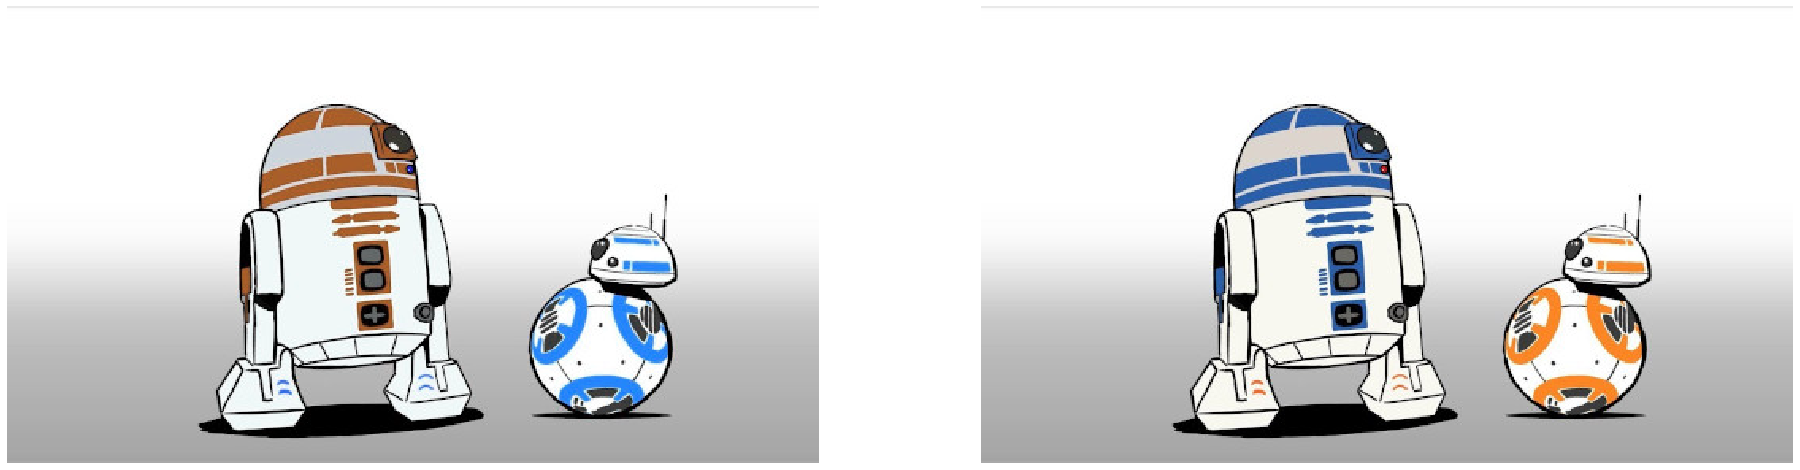

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(32, 16))
axs = axs.ravel()

axs[0].axis('off')
axs[0].imshow(img_bgr)

axs[1].axis('off')
axs[1].imshow(img_rgb)